<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/Machine%20learning%20projects/Last_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Prediction


In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [130]:
train='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/laptops_train%20(1).csv'
test='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/laptops_test%20(1).csv'

In [209]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)
  print('-----------------------------------------------')

## DataPreprocesing

In [132]:
df_train=pd.read_csv(train)
df_test=pd.read_csv(test)

In [133]:
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [134]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [135]:
df_train.shape

(977, 13)

In [136]:
df_test.shape

(325, 13)

In [137]:
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [138]:
def nulos(datos):
  print('Nulls')
  print(datos.isnull().sum())
  print('Sum Nulls')
  print(datos.isnull().sum().sum())
  print()

nulos(df_train)
nulos(df_test)


Nulls
Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64
Sum Nulls
136

Nulls
Manufacturer                 0
Model Name                   0
Category                     0
Screen Size                  0
Screen                       0
CPU                          0
RAM                          0
 Storage                     0
GPU                          0
Operating System             0
Operating System Version    34
Weight                       0
Price                        0
dtype: int64
Sum Nulls
34



In [139]:
def remplazar_1(datos,columna):
  datos[columna]=datos[columna].str.replace('"','').astype(float)
  datos.head()

remplazar_1(df_train, 'Screen Size')
remplazar_1(df_test, 'Screen Size')

In [140]:
def remplazar_2(datos,columna):
  datos[columna]=datos[columna].apply(lambda x: float(x.split('kg')[0]) if isinstance(x,str) else x)
  datos.head()
remplazar_2(df_train,'Weight')
remplazar_2(df_test,'Weight')

In [141]:
df_train['Model_name_avg'] = df_train.groupby(['Model Name'])['Price'].transform('median').round(2)
df_train['CPU_avg'] = df_train.groupby(['CPU'])['Price'].transform('median').round(2)
df_train['GPU_avg'] = df_train.groupby(['GPU'])['Price'].transform('median').round(2)

df_test['Model_name_avg'] = df_test.groupby(['Model Name'])['Price'].transform('median').round(2)
df_test['CPU_avg'] = df_test.groupby(['CPU'])['Price'].transform('median').round(2)
df_test['GPU_avg'] = df_test.groupby(['GPU'])['Price'].transform('median').round(2)

In [142]:
def group(value):
    if value >= 25000000:
        return 0
    elif value >= 20000000  and value < 25000000:
        return 1
    elif value >= 15000000  and value < 20000000:
        return 2
    elif value >= 10000000  and value < 15000000:
        return 3
    else:
        return 4

In [143]:
df_train['model_name_group'] = df_train.apply(lambda x: group(x['Model_name_avg']),axis=1)
df_train['cpu_group'] = df_train.apply(lambda x: group(x['CPU_avg']),axis=1)
df_train['gpu_group'] = df_train.apply(lambda x: group(x['GPU_avg']),axis=1)

df_test['model_name_group'] = df_test.apply(lambda x: group(x['Model_name_avg']),axis=1)
df_test['cpu_group'] = df_test.apply(lambda x: group(x['CPU_avg']),axis=1)
df_test['gpu_group'] = df_test.apply(lambda x: group(x['GPU_avg']),axis=1)

### **Grouped by the laptop model type and the price**

In [144]:
df_train['model_name_group'].value_counts() #agrupado por el modelo y el precio 

4    600
3    198
2    114
1     37
0     28
Name: model_name_group, dtype: int64

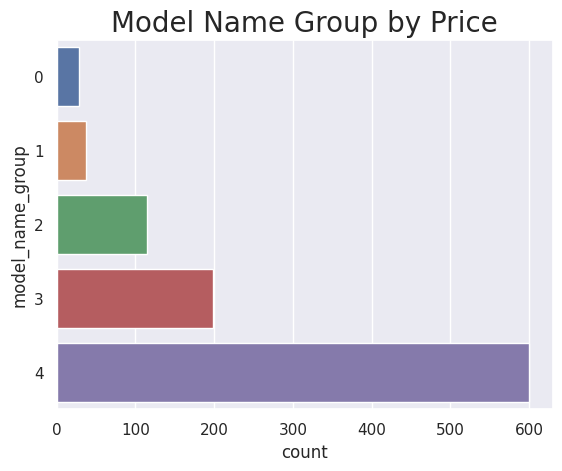

In [145]:
sns.countplot(data=df_train, y="model_name_group")
plt.title('Model Name Group by Price',fontsize=20)
plt.show()

### **CPU**

In [146]:
df_train['CPU'].value_counts().nunique

<bound method IndexOpsMixin.nunique of Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: CPU, Length: 106, dtype: int64>

In [147]:
def fetchprocessor(text):
    if 'Intel Core i5' in text:
        return 'Intel Core i5'
    elif 'Intel Core i7' in text:
        return 'Intel Core i7'
    elif 'Intel Core i3' in text:
        return 'Intel Core i3'
    elif text.startswith("Intel"):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [148]:
def remplazar_3(datos,columna):
  datos[columna]=datos[columna].apply(fetchprocessor)
  print(datos[columna].value_counts().nunique)

In [149]:
remplazar_3(df_train,'CPU')
remplazar_3(df_test,'CPU')

<bound method IndexOpsMixin.nunique of Intel Core i7            386
Intel Core i5            330
Other Intel Processor    108
Intel Core i3            105
AMD Processor             48
Name: CPU, dtype: int64>
<bound method IndexOpsMixin.nunique of Intel Core i7            140
Intel Core i5             93
Other Intel Processor     46
Intel Core i3             31
AMD Processor             15
Name: CPU, dtype: int64>


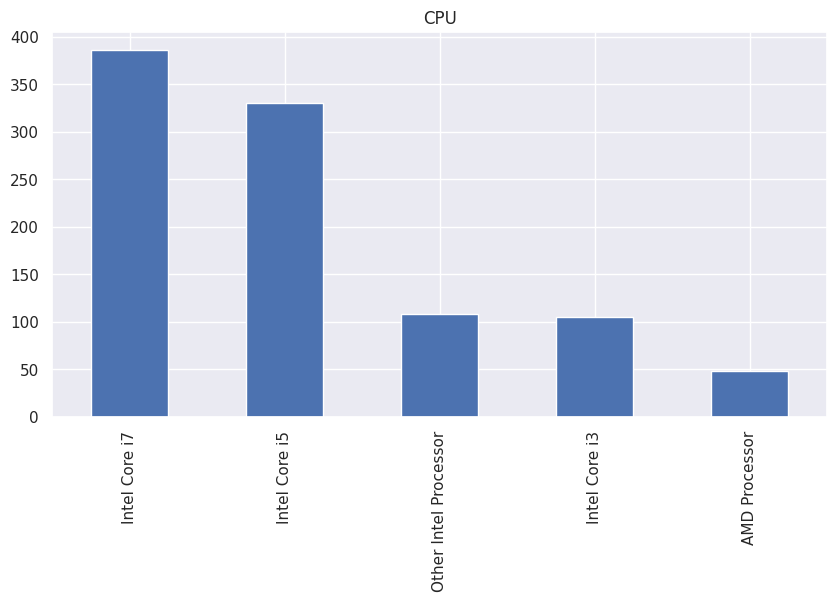

In [150]:
plt.figure(figsize = (10,5))
df_train["CPU"].value_counts().plot(kind = 'bar')
plt.title('CPU')
plt.show()

### **CPU_Group**

In [151]:
df_train['cpu_group'].value_counts()

4    612
3    172
2    172
1     11
0     10
Name: cpu_group, dtype: int64

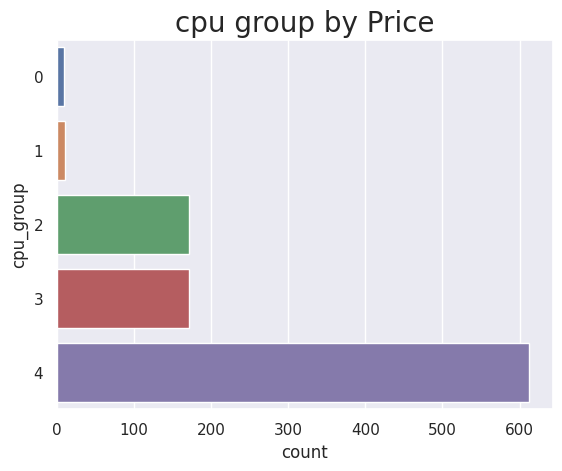

In [152]:
sns.countplot(data=df_train, y="cpu_group")
plt.title('cpu group by Price',fontsize=20)
plt.show()

### **GPU**

In [153]:
def gpu(text):
    if 'Intel' in text:
        return 'Intel'
    elif 'AMD' in text:
        return 'AMD'
    elif 'Nvidia' in text :
        return 'Nvidia'
    else:
        return 'Other GPU'

In [154]:
def remplazar_4(datos,columna):
  datos[columna]=datos[columna].apply(gpu)
  print(datos[columna].value_counts().nunique)

In [155]:
remplazar_4(df_train,"GPU")
remplazar_4(df_test,"GPU")

<bound method IndexOpsMixin.nunique of Intel     525
Nvidia    310
AMD       142
Name: GPU, dtype: int64>
<bound method IndexOpsMixin.nunique of Intel        197
Nvidia        89
AMD           38
Other GPU      1
Name: GPU, dtype: int64>


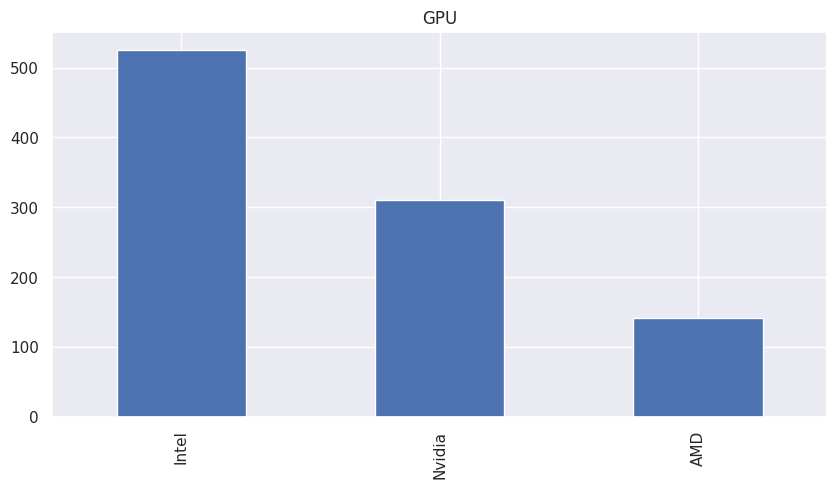

In [156]:
plt.figure(figsize = (10,5))
df_train['GPU'].value_counts().plot(kind = 'bar')
plt.title('GPU')
plt.show()

### **GPU_Group**

In [157]:
df_train['gpu_group'].value_counts()

4    783
3     75
2     73
1     34
0     12
Name: gpu_group, dtype: int64

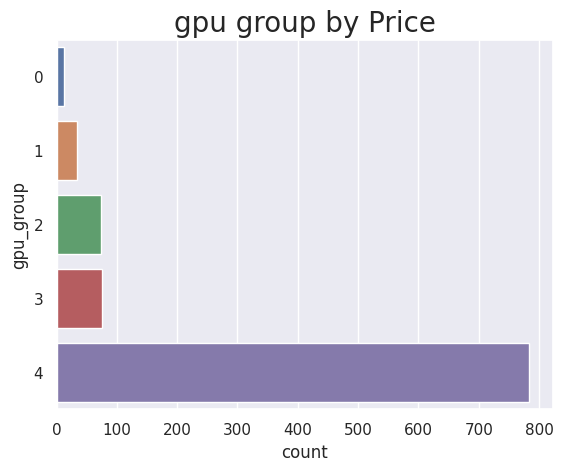

In [158]:
sns.countplot(data=df_train, y="gpu_group")
plt.title('gpu group by Price',fontsize=20)
plt.show()

### **Operating System**

In [159]:
df_train['Operating System'].value_counts().nunique

<bound method IndexOpsMixin.nunique of Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64>

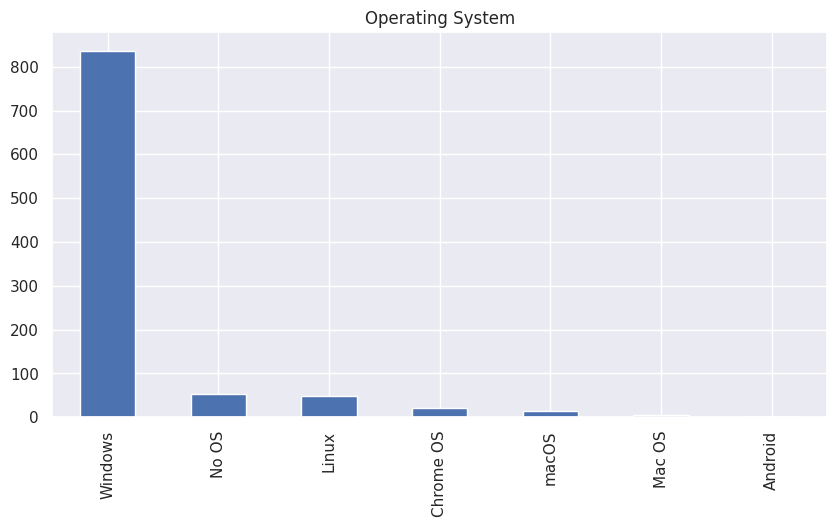

In [160]:
plt.figure(figsize = (10,5))
df_train["Operating System"].value_counts().plot(kind = 'bar')
plt.title('Operating System')
plt.show()

In [161]:
def remplazar_4(datos,columna):
  datos[columna]=datos[columna].str.replace('Mac OS','macOS')
  print(datos[columna].value_counts().nunique)

In [162]:
remplazar_4(df_train,'Operating System')
remplazar_4(df_test,'Operating System')

<bound method IndexOpsMixin.nunique of Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         17
Android        1
Name: Operating System, dtype: int64>
<bound method IndexOpsMixin.nunique of Windows      287
No OS         14
Linux         14
Chrome OS      5
macOS          4
Android        1
Name: Operating System, dtype: int64>


### **Screen**

In [163]:
df_train['Screen'].value_counts().nunique

<bound method IndexOpsMixin.nunique of Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Pan

In [164]:
def remplazar_5(datos,columna):
  datos[columna]=datos[columna].str.slice(-9)
  datos[columna]=datos[columna].str.slice(-9)
  print(datos[columna].value_counts().nunique)
  print()

In [165]:
remplazar_5(df_train,'Screen')
remplazar_5(df_test,'Screen')

<bound method IndexOpsMixin.nunique of 1920x1080    655
1366x768     180
3840x2160     36
 1366x768     26
1600x900      19
3200x1800     15
2560x1440     15
2560x1600      6
2256x1504      6
1440x900       4
2880x1800      4
2304x1440      3
2400x1600      3
1920x1200      2
2160x1440      2
2736x1824      1
Name: Screen, dtype: int64>

<bound method IndexOpsMixin.nunique of 1920x1080    186
1366x768     101
3200x1800     12
2560x1440      8
3840x2160      6
1600x900       4
2304x1440      3
1920x1200      3
2400x1600      1
 1366x768      1
Name: Screen, dtype: int64>



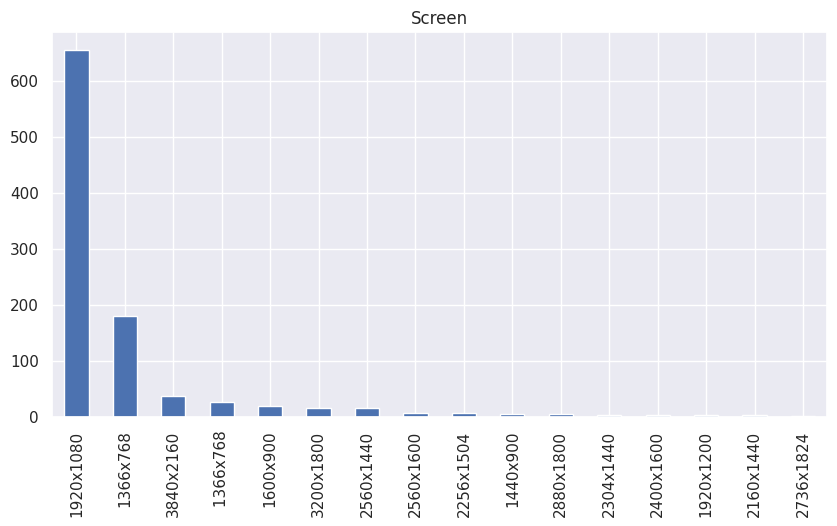

In [166]:
plt.figure(figsize = (10,5))
df_train['Screen'].value_counts().plot(kind = 'bar')
plt.title('Screen')
plt.show()

### **Storage**

In [167]:
df_train[" Storage"].value_counts()

256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD      1
2

In [168]:
def fetchstorage(text):
    if '1TB HDD' in text:
        return '1TB HDD'
    elif '512GB SSD' in text:
        return '512GB SSD'
    elif '256GB SSD' in text:
        return '256GB SSD'
    elif '128GB SSD' in text:
        return '128GB SSD'
    elif '500GB HDD' in text:
        return '500GB HDD'
    elif 'Flash Storage' in text:
        return 'Flash Storage'
    else:
        return 'Mixed Storage'

In [169]:
def remplazar_6(datos,columna):
  datos[columna]=datos[columna].apply(fetchstorage)
  print(datos[columna].value_counts())
  print()

In [170]:
remplazar_6(df_train,' Storage')
remplazar_6(df_test,' Storage')

256GB SSD        331
1TB HDD          311
512GB SSD         95
500GB HDD         79
128GB SSD         64
Flash Storage     54
Mixed Storage     43
Name:  Storage, dtype: int64

1TB HDD          98
256GB SSD        96
500GB HDD        53
512GB SSD        28
Flash Storage    20
Mixed Storage    16
128GB SSD        14
Name:  Storage, dtype: int64



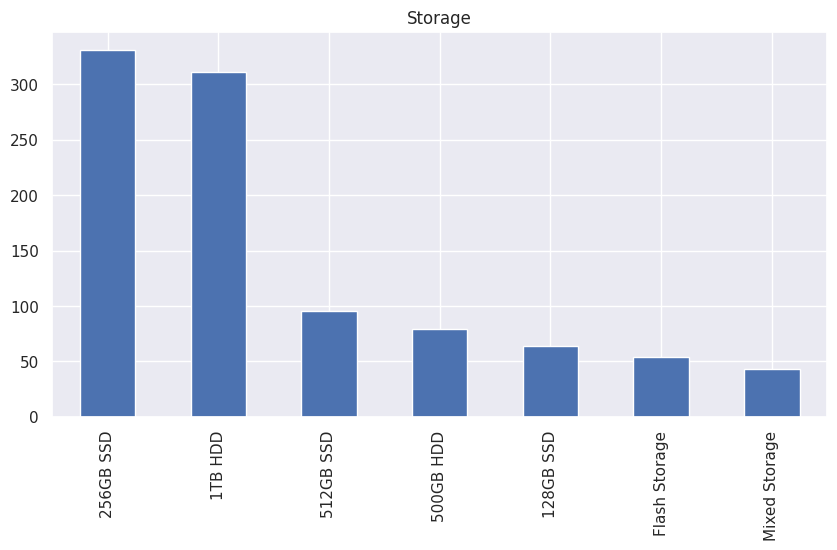

In [171]:
plt.figure(figsize = (10,5))
df_train[' Storage'].value_counts().plot(kind = 'bar')
plt.title('Storage')
plt.show()

**Operating System Version**



In [172]:
def remplazar_7(data,column):
  data[column]=data[column].fillna(data[column].mode()[0])
  print(data[column].value_counts())
  print()

In [173]:
remplazar_7(df_train,'Operating System Version')
remplazar_7(df_test,'Operating System Version')

10      955
7        10
10 S      8
X         4
Name: Operating System Version, dtype: int64

10    286
7      35
X       4
Name: Operating System Version, dtype: int64



In [174]:
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                 float64
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                      float64
Price                       float64
Model_name_avg              float64
CPU_avg                     float64
GPU_avg                     float64
model_name_group              int64
cpu_group                     int64
gpu_group                     int64
dtype: object

In [175]:
df_train.head(2)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Model_name_avg,CPU_avg,GPU_avg,model_name_group,cpu_group,gpu_group
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8GB,128GB SSD,Intel,macOS,10,1.37,11912523.48,17779109.40,12707735.04,15996708.0,2,3,2
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8GB,Flash Storage,Intel,macOS,10,1.34,7993374.48,9148267.44,9148267.44,9323262.0,4,4,4


## **EDA (Exploratory Data Analysis)**

### **Variables Categoricas**

In [176]:
df_train.select_dtypes(include='object').nunique()

Manufacturer                 19
Model Name                  488
Category                      6
Screen                       16
CPU                           5
RAM                           8
 Storage                      7
GPU                           3
Operating System              6
Operating System Version      4
dtype: int64

In [177]:
cat_vars = ['Category','RAM','Operating System','Operating System Version','CPU','GPU'
,'Screen',' Storage']

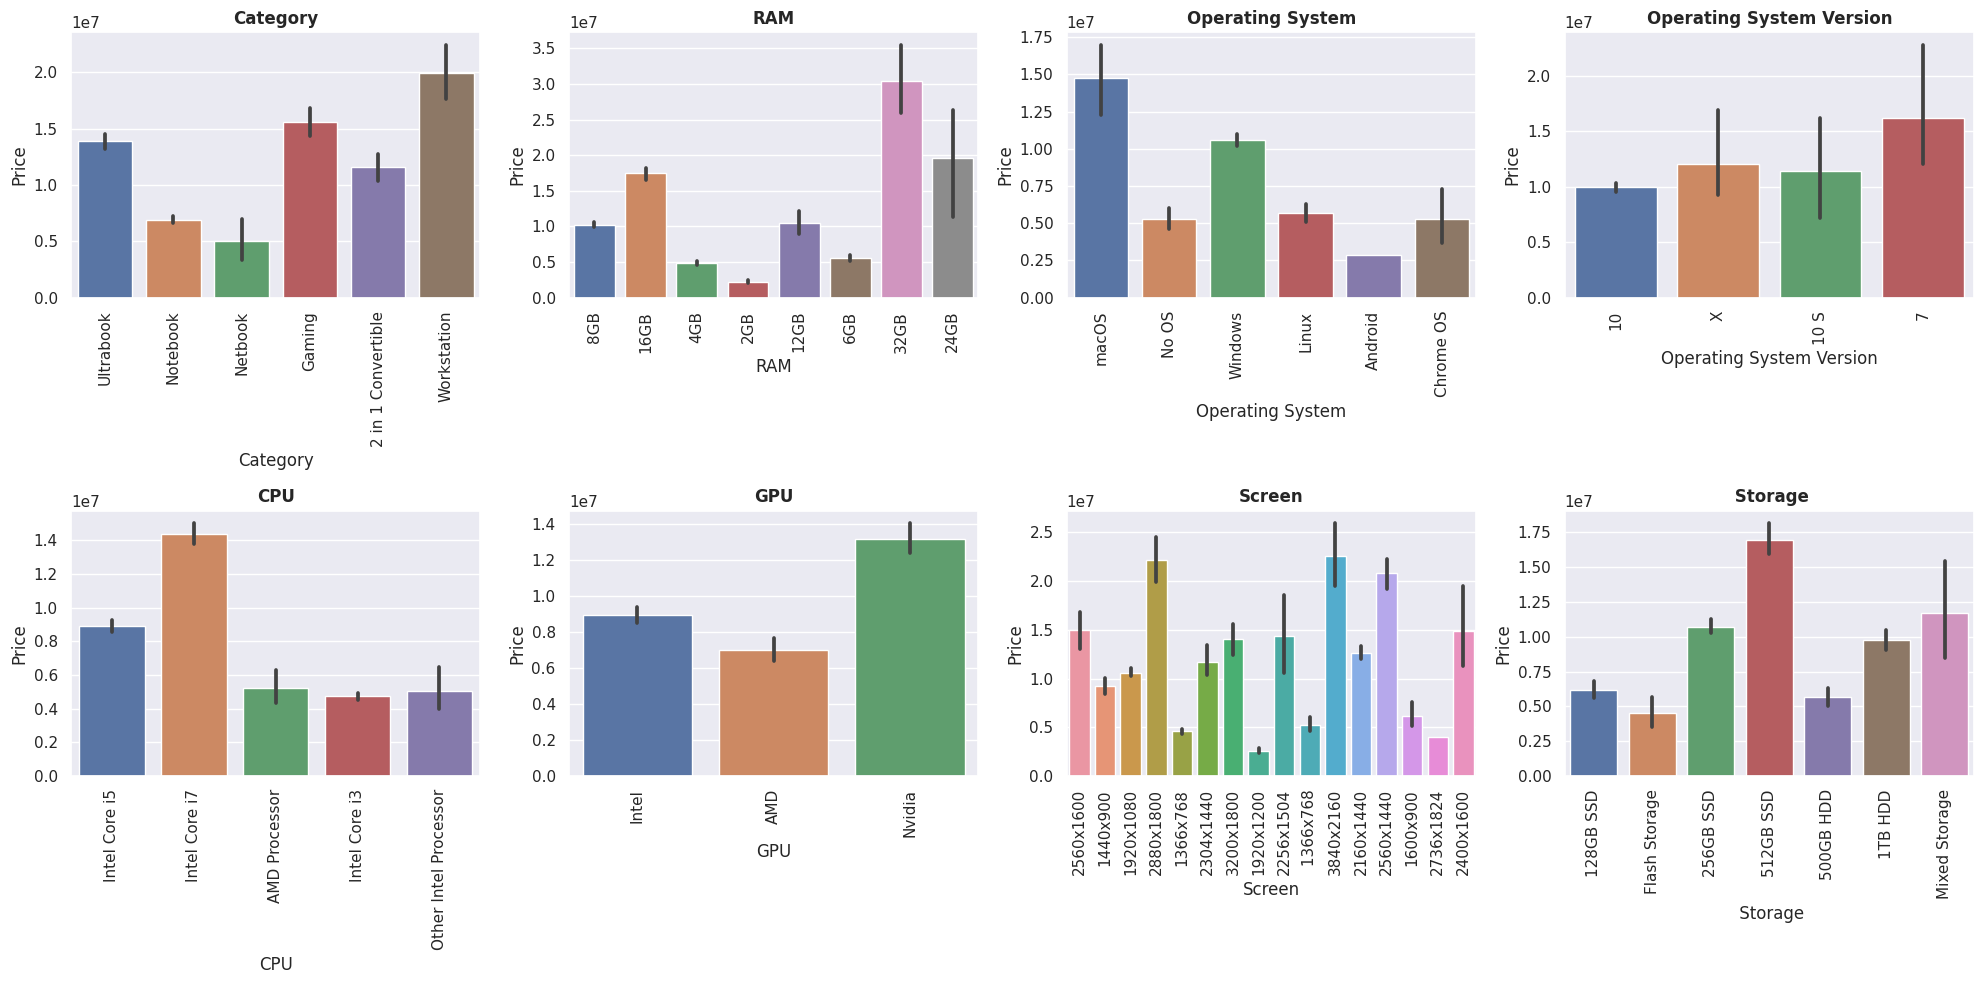

In [178]:
# Create figures with subplots
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))
axs = axs.flatten()

# create barplots for each categorical variable

for i, var in enumerate(cat_vars):
    sns.barplot(x = var, y = 'Price', data = df_train, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90)
    axs[i].set_title(var, fontsize = 12, fontweight = "bold")
    

# adjust spacing between subplots

fig.tight_layout()

plt.show()

### **Variables Numericas**

In [179]:
df_train.select_dtypes(include='number').nunique()

Screen Size          18
Weight              160
Price               639
Model_name_avg      377
CPU_avg             101
GPU_avg              94
model_name_group      5
cpu_group             5
gpu_group             5
dtype: int64

In [180]:
num_vars = ['Screen Size', 'Weight','Price']

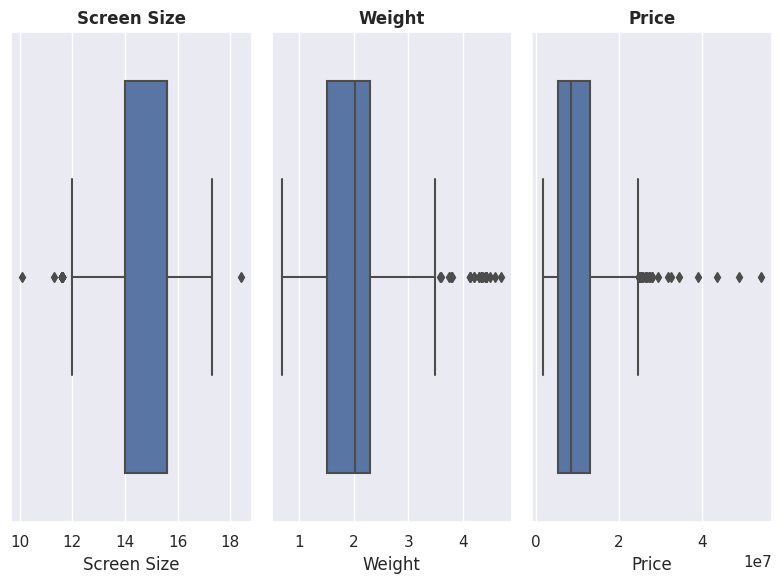

In [181]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (8,6))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x = var, data = df_train, ax = axs[i])
    axs[i].set_title(var, fontsize = 12, fontweight = "bold")
fig.tight_layout()
plt.show()

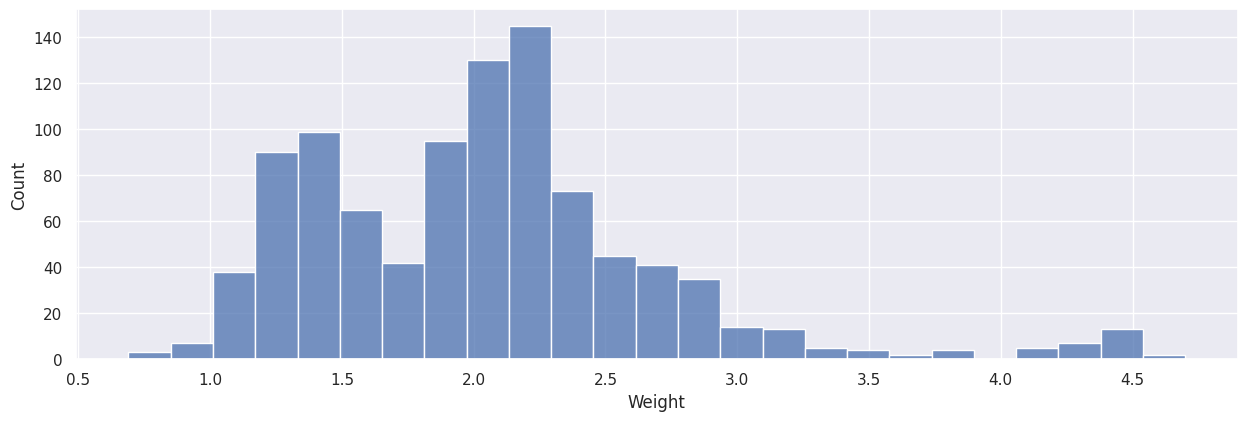

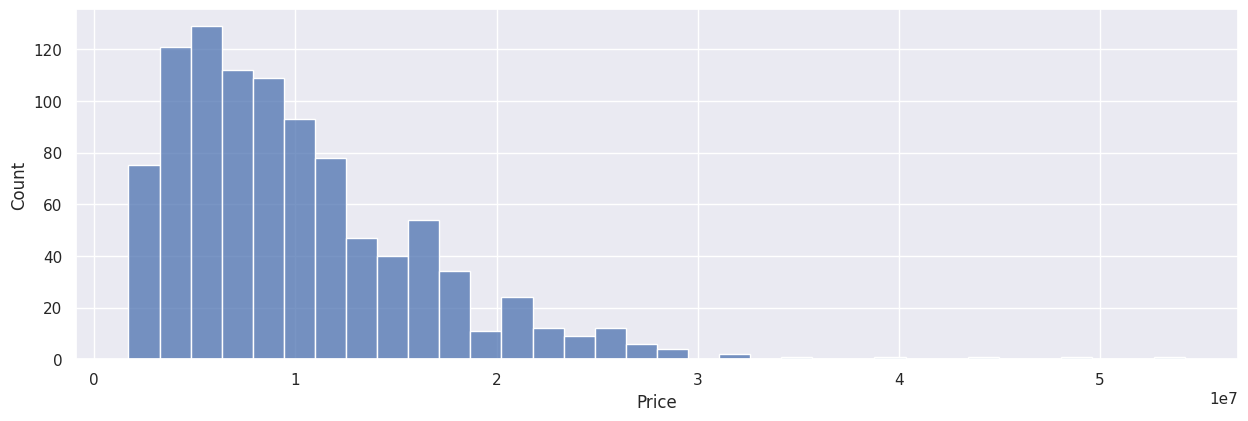

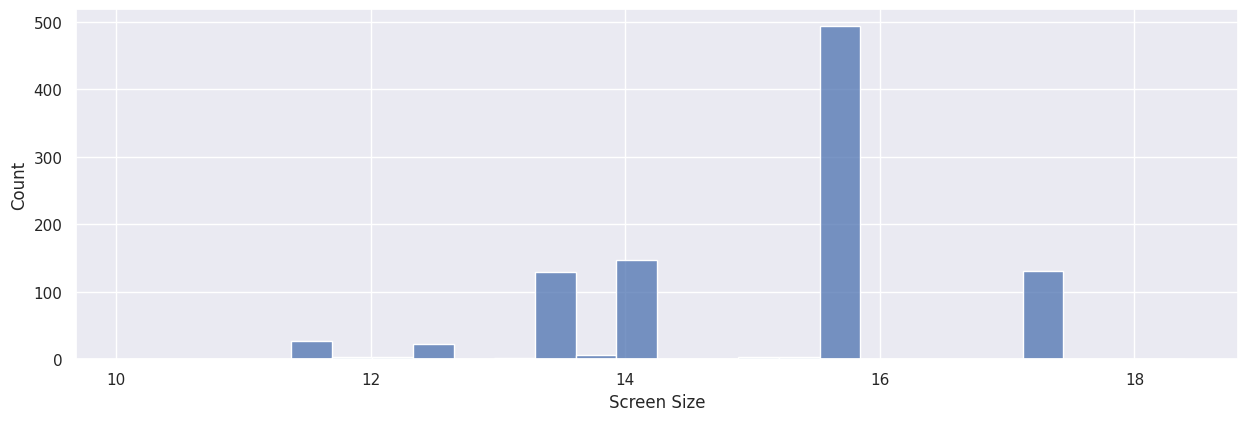

In [182]:
plt.figure(figsize = (15,10))
sns.set(color_codes = True)
plt.subplot(2,1,1)
sns.histplot(df_train['Weight'], kde = False)
plt.show()
plt.figure(figsize = (15,10))
plt.subplot(2,1,2)
sns.histplot(df_train.Price, kde = False)
plt.show()
plt.figure(figsize = (15,10))
plt.subplot(2,1,2)
sns.histplot(df_train['Screen Size'], kde = False)
plt.show()

**Here we can see that we have some outliers but we will keep them for now.**

In [183]:
df_train.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'Model_name_avg',
       'CPU_avg', 'GPU_avg', 'model_name_group', 'cpu_group', 'gpu_group'],
      dtype='object')

* we can see that gaming computers and workstation computers are the ones with a higher average price, we can also see that the more ram the more expensive the computer generally tends to be, which makes a lot of sense, we can see that Mac computers are generally more expensive than other operating systems

<Axes: xlabel='Operating System Version', ylabel='Price'>

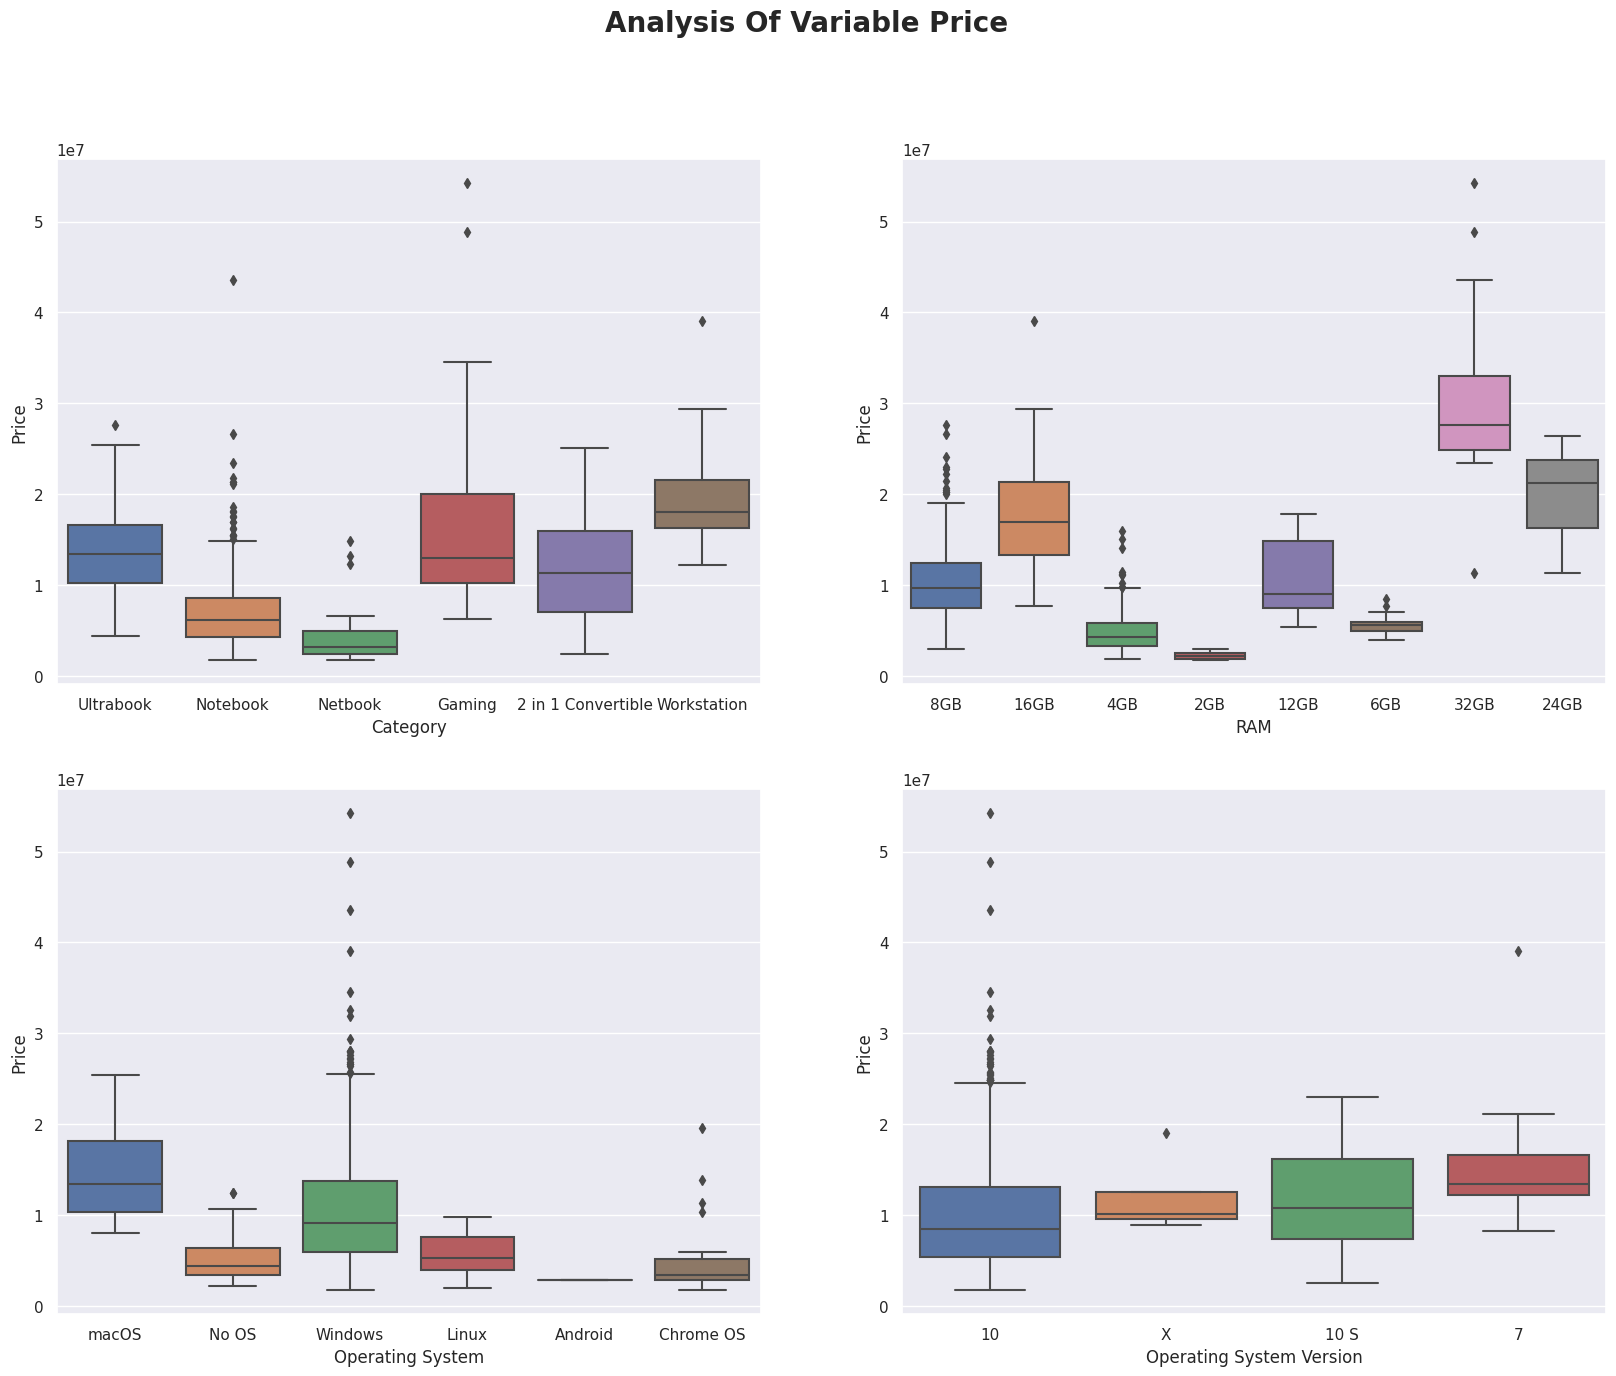

In [184]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable Price",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(x="Category", y="Price", data=df_train)

plt.subplot(2,2,2)
sns.boxplot(x="RAM", y="Price", data=df_train)

plt.subplot(2,2,3)
sns.boxplot(x="Operating System", y="Price", data=df_train)

plt.subplot(2,2,4)
sns.boxplot(x="Operating System Version", y="Price", data=df_train)

* Razer is the most expensive manufacturer among all.
* The screen size varies greatly


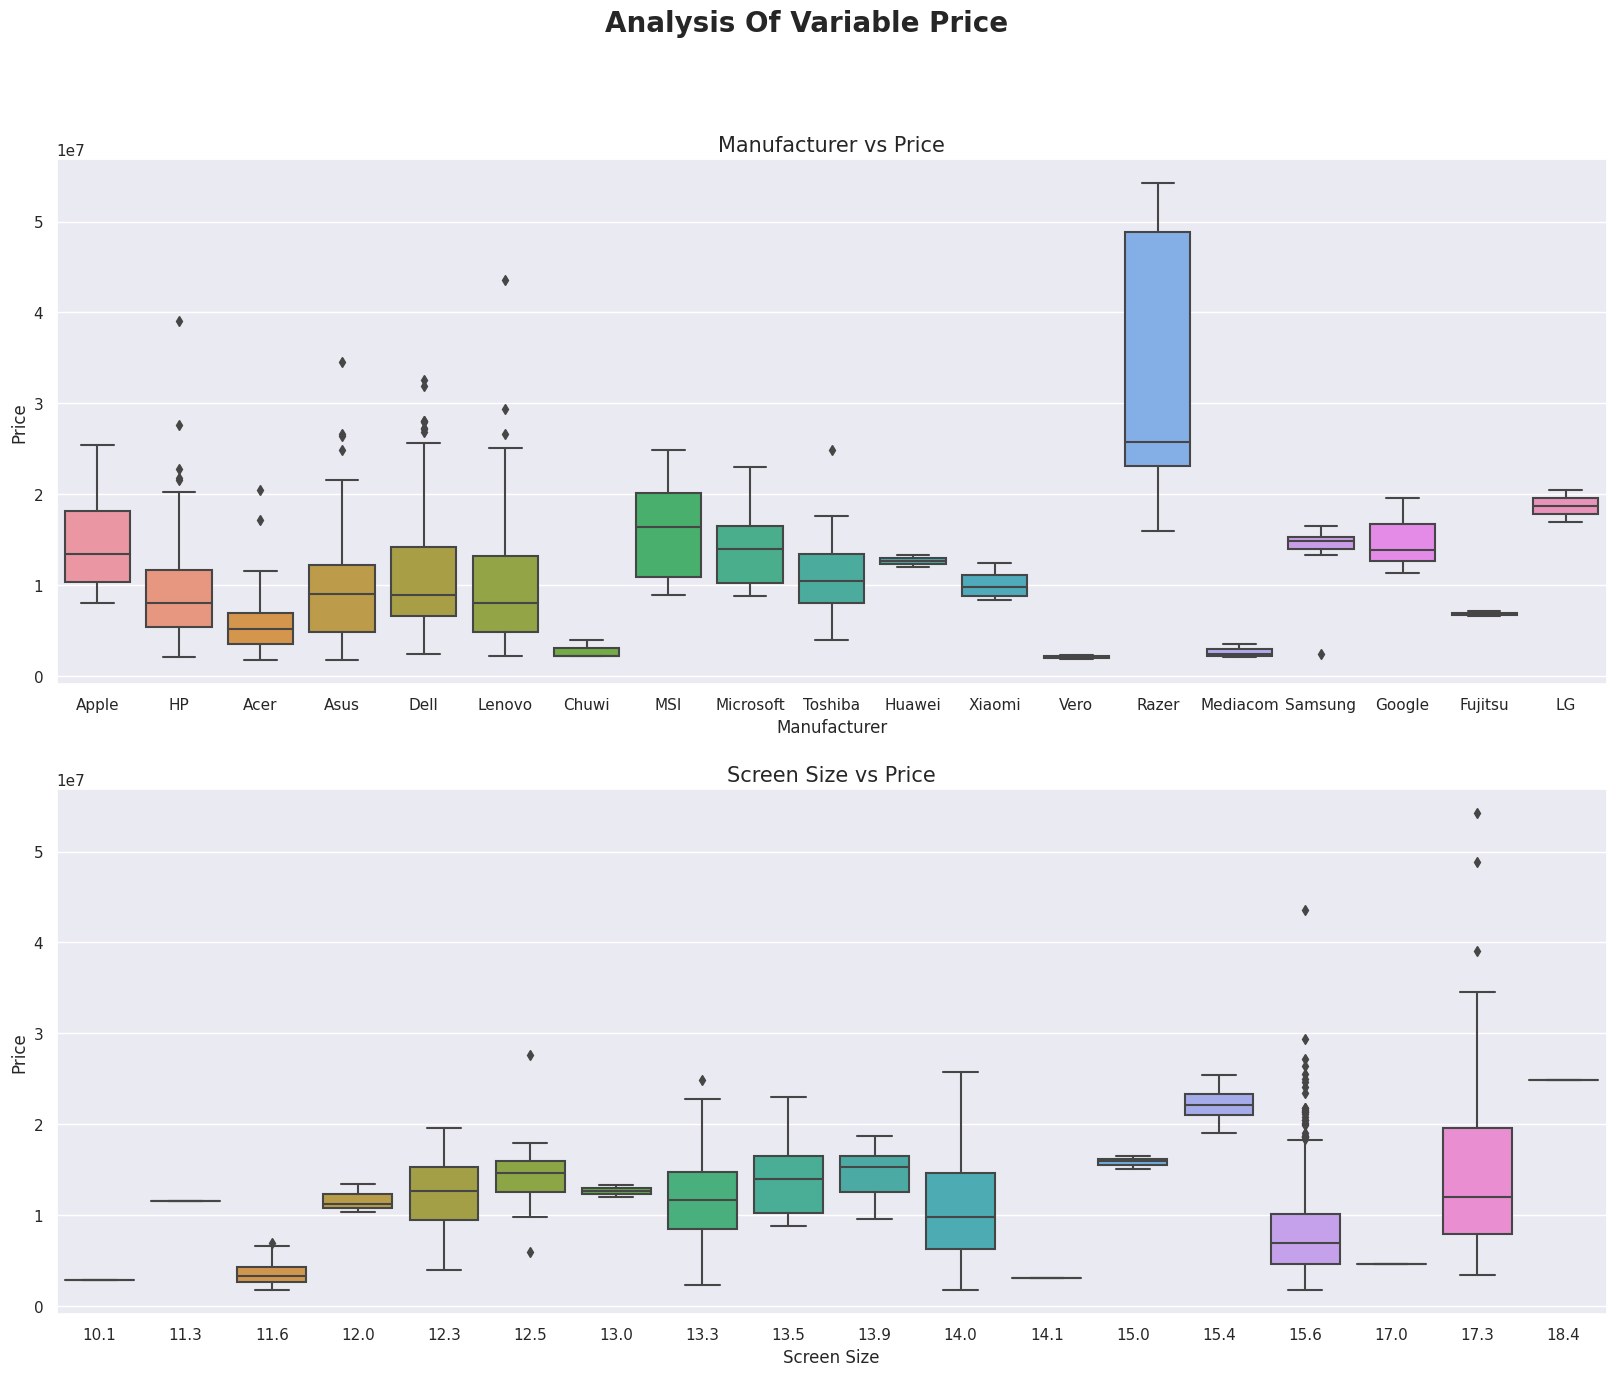

In [185]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable Price",fontweight="bold", fontsize=20)
plt.subplot(2,1,1)
sns.boxplot(x="Manufacturer", y="Price", data=df_train)
plt.title('Manufacturer vs Price',fontsize=15)
plt.subplot(2,1,2)
sns.boxplot(x="Screen Size", y="Price", data=df_train)
plt.title('Screen Size vs Price',fontsize=15)
plt.show()

When comparing the Width variable with our target variable, we did not find a clear pattern.

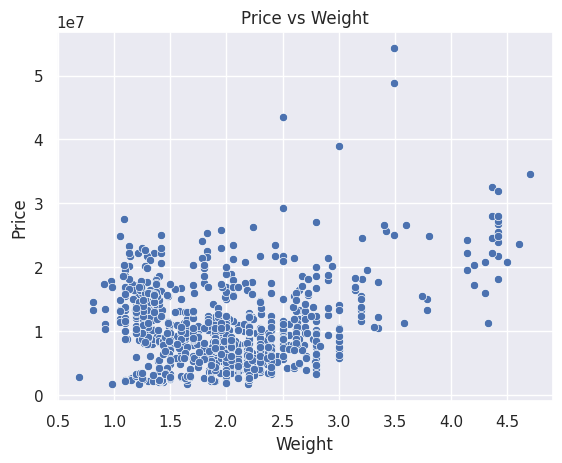

In [186]:
sns.scatterplot(data=df_train,x='Weight',y='Price')
plt.title('Price vs Weight',fontsize=12)
plt.show()

### **Outliers**

## Model Building 

In [187]:
df_train.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'Model_name_avg',
       'CPU_avg', 'GPU_avg', 'model_name_group', 'cpu_group', 'gpu_group'],
      dtype='object')

In [188]:
#Now We removed unnecessary columns
df_train_new=df_train.drop(['Model Name','CPU','GPU','Model_name_avg', 'CPU_avg', 'GPU_avg'],axis=1)
df_test_new=df_test.drop(['Model Name','CPU','GPU','Model_name_avg', 'CPU_avg', 'GPU_avg'],axis=1)

In [189]:
df_train_new.isnull().sum()

Manufacturer                0
Category                    0
Screen Size                 0
Screen                      0
RAM                         0
 Storage                    0
Operating System            0
Operating System Version    0
Weight                      0
Price                       0
model_name_group            0
cpu_group                   0
gpu_group                   0
dtype: int64

In [190]:
from sklearn.preprocessing import LabelEncoder
label_encoder_Manufacturer=LabelEncoder() #manufacturing
label_encoder_Category=LabelEncoder() #Category
label_encoder_Screen_Size=LabelEncoder() #ScreenSize
label_encoder_Screen=LabelEncoder() #Screen
label_encoder_Storage = LabelEncoder() #Storage
label_encoder_Ram=LabelEncoder() #Ram
label_encoder_Operating_System=LabelEncoder() #operantingSystem
label_encoder_Operating_System_Version=LabelEncoder() #operantingSystemVersion

In [191]:
df_train_new['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df_train_new['Manufacturer'])
df_train_new['Category']=label_encoder_Category.fit_transform(df_train_new['Category'])
df_train_new['Screen Size']=label_encoder_Screen_Size.fit_transform(df_train_new['Screen Size'])
df_train_new['Screen']=label_encoder_Screen.fit_transform(df_train_new['Screen'])
df_train_new['RAM']=label_encoder_Ram.fit_transform(df_train_new['RAM'])
df_train_new['Operating System']=label_encoder_Operating_System.fit_transform(df_train_new['Operating System'])
df_train_new['Operating System Version']=label_encoder_Operating_System_Version.fit_transform(df_train_new['Operating System Version'])
df_train_new[' Storage']=label_encoder_Storage.fit_transform(df_train_new[' Storage'])

In [192]:
df_test_new['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df_test_new['Manufacturer'])
df_test_new['Category']=label_encoder_Category.fit_transform(df_test_new['Category'])
df_test_new['Screen Size']=label_encoder_Screen_Size.fit_transform(df_test_new['Screen Size'])
df_test_new['Screen']=label_encoder_Screen.fit_transform(df_test_new['Screen'])
df_test_new['RAM']=label_encoder_Ram.fit_transform(df_test_new['RAM'])
df_test_new['Operating System']=label_encoder_Operating_System.fit_transform(df_test_new['Operating System'])
df_test_new['Operating System Version']=label_encoder_Operating_System_Version.fit_transform(df_test_new['Operating System Version'])
df_test_new[' Storage']=label_encoder_Storage.fit_transform(df_test_new[' Storage'])

**Train_Test_Split**

In [193]:
X_train = df_train_new.drop('Price', axis = 1)
X_train = X_train.values
y_train = df_train_new['Price']
X_test = df_test_new.drop('Price', axis = 1)
X_test = X_test.values
y_test = df_test_new['Price']

In [194]:
print(X_train.shape)
print(X_test.shape)

(977, 12)
(325, 12)


In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard_train = scaler.fit_transform(X_train)
y_standard_train = scaler.fit_transform(y_train.values.reshape(-1,1))
X_standard_test = scaler.fit_transform(X_test)
y_standard_test = scaler.fit_transform(y_test.values.reshape(-1,1))

**StandarScaler**

In [196]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_standard_train=scaler.fit_transform(X_train)
y_standard_test=scaler.fit_transform(y_train.values.reshape(-1,1)) #dont forget reshape
X_standard_test=scaler.fit_transform(X_test)
y_standard_test=scaler.fit_transform(y_test.values.reshape(-1,1)) #dont forget reshape

### **Linear Regresion Model**

In [197]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [198]:
model(lr_model,X_train,y_train,X_test, y_test)

Train : 0.8535762736231117
Test : 0.8001205027502287
Mean Absolute Error : 1925920.4479844929
Root Mean Square Error : 2652995.848853397
-----------------------------------------------


* In the Linear Regression model, we achieved an accuracy of 80.01%, which is considered a good model. When evaluating our error, we obtained a MAE (Mean Absolute Error) of 192590.45 and a RMSE (Root Mean Squared Error) of 2652995.85.

### **Ridge and Lassso**

In [199]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = Lasso(alpha=0.1)  # alpha controla la fuerza de la regularización en Lasso
ridge_model = Ridge(alpha=0.5)  # alpha controla la fuerza de la regularización en Ridge

In [200]:
model(ridge_model,X_train,y_train,X_test, y_test)

Train : 0.8535760757730921
Test : 0.8001152411291022
Mean Absolute Error : 1926027.1655622197
Root Mean Square Error : 2653030.767310107
-----------------------------------------------


In [201]:
model(lasso_model,X_train,y_train,X_test,y_test)

Train : 0.8535762736231043
Test : 0.8001205137275136
Mean Absolute Error : 1925920.3810240738
Root Mean Square Error : 2652995.776002775
-----------------------------------------------


### **Polynomial Regression**

In [202]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)
lr_poly=LinearRegression()

In [203]:
model(lr_poly,X_poly_train,y_train,X_poly_test,y_test)

Train : 0.9221105036734857
Test : 0.7366064383040043
Mean Absolute Error : 2244660.2539540776
Root Mean Square Error : 3045474.8946036305
-----------------------------------------------


### **Decision Tree Regression**

In [214]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [215]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] #medidas de error
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeRegressor()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  7
Algorithm:  squared_error
Score:  0.8531741068264168


In [219]:
decision_tree = DecisionTreeRegressor(min_samples_split = 3, max_depth = 7, criterion = 'squared_error')

In [221]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)

In [222]:
model(decision_tree,X_train,y_train,X_test,y_test)

Train : 0.9545982748290055
Test : 0.8317854099496793
Mean Absolute Error : 1678307.1226887454
Root Mean Square Error : 2433796.5828339537


In [223]:
columns = df_train_new.drop('Price', axis=1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index=columns).sort_values(ascending=False)
feature_imp

model_name_group            0.821135
Screen                      0.050602
RAM                         0.040833
cpu_group                   0.038576
 Storage                    0.013846
gpu_group                   0.010019
Weight                      0.008460
Operating System Version    0.004101
Manufacturer                0.003909
Operating System            0.003442
Category                    0.003419
Screen Size                 0.001658
dtype: float64

**Otra forma DecisionTreeRegressor**

In [224]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt','log2'],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}


gcv = GridSearchCV(dtree, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
gcv.fit(X_train,y_train)
print(gcv.best_params_)

{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6}


In [225]:
dtree = DecisionTreeRegressor(max_depth = 8, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 4,criterion='friedman_mse')
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='auto', min_samples_leaf=4,
                      min_samples_split=4)

In [226]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)

In [227]:
model(dtree,X_train,y_train,X_test,y_test)

Train : 0.9414895357640828
Test : 0.8021962434609684
Mean Absolute Error : 1822315.6510289914
Root Mean Square Error : 2639184.2683625016


In [228]:
columns = df_train_new.drop('Price', axis=1).columns
feature_imp = pd.Series(dtree.feature_importances_, index=columns).sort_values(ascending=False)
feature_imp

model_name_group            0.832568
RAM                         0.059090
cpu_group                   0.039619
Screen                      0.028900
 Storage                    0.011285
Weight                      0.010906
Manufacturer                0.007133
gpu_group                   0.006270
Operating System            0.003313
Screen Size                 0.000518
Category                    0.000399
Operating System Version    0.000000
dtype: float64

### **Ramdon Forest**

In [230]:
from sklearn.ensemble import RandomForestRegressor

In [231]:
parameters = {'n_estimators': [50,100,150,200],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
              'max_features': ['auto', 'sqrt']
             }

In [232]:
model = RandomForestRegressor()
gridRandomForest = RandomizedSearchCV(model,parameters, cv = 2)
gridRandomForest.fit(X_train, y_train.ravel())
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)
print("Besth Hyperparameters :",gridRandomForest.best_params_)

Algorithm:  squared_error
Score:  0.8912170729286606
Mín Split:  2
Max Nvl:  9
Besth Hyperparameters : {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'squared_error'}


In [239]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, 
max_depth= 9,  criterion = 'squared_error',max_features='sqrt')

In [240]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)

In [241]:
model(regressor_rf,X_train,y_train,X_test,y_test)

Train : 0.9647523720327243
Test : 0.8272232237127803
Mean Absolute Error : 1747936.6332600839
Root Mean Square Error : 2466579.567079221


In [242]:
feature_imp_random = pd.Series(regressor_rf.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

model_name_group            0.338469
gpu_group                   0.157130
cpu_group                   0.136312
RAM                         0.090014
Weight                      0.083163
Screen                      0.074192
Category                    0.039537
 Storage                    0.033639
Manufacturer                0.023522
Screen Size                 0.015795
Operating System            0.005699
Operating System Version    0.002529
dtype: float64

### **Adabost**

In [243]:
from sklearn.ensemble import AdaBoostRegressor
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 1.5, 1.3, 0.03, 0.4])
loss_value=['linear','square','exponential']
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate,'loss':loss_value}
model = AdaBoostRegressor()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = 1)
gridAdaBoost.fit(X_train, y_train)
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)
print('Estimadores :',gridAdaBoost.best_params_)

Learning Rate:  0.4
Score:  0.8451308078189245
Estimadores : {'learning_rate': 0.4, 'loss': 'linear', 'n_estimators': 500}


In [244]:
ada_boost = AdaBoostRegressor(learning_rate = 0.4, n_estimators = 500,loss='linear')

In [245]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)

In [246]:
model(ada_boost,X_train,y_train,X_test, y_test)

Train : 0.8876248336221836
Test : 0.80229761885633
Mean Absolute Error : 1989723.319528697
Root Mean Square Error : 2638507.8842480974


In [247]:
feature_imp_random = pd.Series(ada_boost.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

model_name_group            0.511651
gpu_group                   0.220779
cpu_group                   0.133360
Screen                      0.040266
 Storage                    0.033250
Manufacturer                0.031121
RAM                         0.015454
Weight                      0.006453
Category                    0.004184
Operating System Version    0.002881
Screen Size                 0.000602
Operating System            0.000000
dtype: float64

### **Gradient Boosting Regression**

In [250]:
from sklearn.ensemble import GradientBoostingRegressor
n_estimators = np.array([500])
learning_rate = np.array([0.01, 0.02, 0.003, 0.0001, 0.5, 0.4])
criterion = np.array(['friedman_mse', 'squared_error'])
loos_values=['squared_error', 'absolute_error', 'huber', 'quantile']
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'criterion': criterion,'loss':loos_values}
model = GradientBoostingRegressor()
gridGradientBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = 1)
gridGradientBoost.fit(X_train, y_train)

print('Learning Rate: ', gridGradientBoost.best_estimator_.learning_rate)
print('Criterion: ', gridGradientBoost.best_estimator_.criterion)
print('Score: ', gridGradientBoost.best_score_)
print('Estimadores :', gridGradientBoost.best_params_)

Learning Rate:  0.02
Criterion:  friedman_mse
Score:  0.9121682725161648
Estimadores : {'criterion': 'friedman_mse', 'learning_rate': 0.02, 'loss': 'huber', 'n_estimators': 500}


In [251]:
grad_boost = GradientBoostingRegressor(learning_rate = 0.02, n_estimators = 500, criterion = 'friedman_mse',loss='huber')

In [253]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)

In [254]:
model(grad_boost,X_train,y_train,X_test, y_test)

Train : 0.9524282436583644
Test : 0.8307701909326002
Mean Absolute Error : 1718075.7361948323
Root Mean Square Error : 2441129.8342044353


In [255]:
feature_imp_random = pd.Series(grad_boost.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

model_name_group            0.789567
RAM                         0.078713
cpu_group                   0.040910
Screen                      0.025518
 Storage                    0.019096
Weight                      0.012360
gpu_group                   0.010787
Manufacturer                0.007318
Category                    0.006273
Operating System            0.005142
Screen Size                 0.003427
Operating System Version    0.000888
dtype: float64

### **LGBM Regressor**

In [256]:
from lightgbm import LGBMRegressor

In [257]:
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'num_leaves': [3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

In [258]:
model = LGBMRegressor()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
lgbm_grid.fit(X_train, y_train)

print('Score: ', lgbm_grid.best_score_)
print('Params: ', lgbm_grid.best_params_)

Score:  0.8894838465976598
Params:  {'subsample': 0.1, 'reg_lambda': 0.1, 'reg_alpha': 0.3, 'num_leaves': 3, 'n_estimators': 500, 'min_child_weight': 9, 'max_depth': 2, 'learning_rate': 0.5, 'colsample_bytree': 0.9}


In [259]:
lgbm = LGBMRegressor(subsample = 0.3, reg_lambda = 0.9, num_leaves = 9, 
reg_alpha = 0.5, n_estimators = 500, min_child_weight = 7, max_depth = 5, 
learning_rate = 0.1, colsample_bytree = 0.3)

In [260]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)

In [261]:
model(lgbm,X_train,y_train,X_test, y_test)

Train : 0.9636743092385783
Test : 0.7662553336122767
Mean Absolute Error : 2180751.5905074617
Root Mean Square Error : 2868952.125418658


In [262]:
feature_imp_random = pd.Series(lgbm.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Weight                      931
Manufacturer                486
Screen Size                 421
RAM                         341
cpu_group                   313
gpu_group                   270
Screen                      253
model_name_group            223
 Storage                    221
Category                    183
Operating System             84
Operating System Version     28
dtype: int32

## **Resumen**

In [267]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print(model)
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)
  print()

In [268]:
model(lr_model,X_train,y_train,X_test, y_test)
model(ridge_model,X_train,y_train,X_test, y_test)
model(lasso_model,X_train,y_train,X_test,y_test)
model(lr_poly,X_poly_train,y_train,X_poly_test,y_test)
model(dtree,X_train,y_train,X_test,y_test)
model(regressor_rf,X_train,y_train,X_test,y_test)
model(ada_boost,X_train,y_train,X_test, y_test)
model(grad_boost,X_train,y_train,X_test, y_test)
model(lgbm,X_train,y_train,X_test, y_test)

LinearRegression()
Train : 0.8535762736231117
Test : 0.8001205027502287
Mean Absolute Error : 1925920.4479844929
Root Mean Square Error : 2652995.848853397

Ridge(alpha=0.5)
Train : 0.8535760757730921
Test : 0.8001152411291022
Mean Absolute Error : 1926027.1655622197
Root Mean Square Error : 2653030.767310107

Lasso(alpha=0.1)
Train : 0.8535762736231043
Test : 0.8001205137275136
Mean Absolute Error : 1925920.3810240738
Root Mean Square Error : 2652995.776002775

LinearRegression()
Train : 0.9221105036734857
Test : 0.7366064383040043
Mean Absolute Error : 2244660.2539540776
Root Mean Square Error : 3045474.8946036305

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='auto', min_samples_leaf=4,
                      min_samples_split=4)
Train : 0.9414895357640828
Test : 0.8021962434609684
Mean Absolute Error : 1822315.6510289914
Root Mean Square Error : 2639184.268362501

RandomForestRegressor(max_depth=9, max_features='sqrt')
Train : 0.9650

* Among all the models used, the best test score was achieved by the GradientBoostingRegressor model and the RandomForestRegressor model with 83.40% and 82.53% respectively